In [23]:
#Preparing the environment

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#Data Loading and Observation

df = pd.read_csv('E:\BootCamp Assignments\ML_based_Chronic-_Kidney_Disease_Prediction\Chronic_Kidney_disease_dataset.csv')
df.head(10)

<>:3: SyntaxWarning: invalid escape sequence '\B'
<>:3: SyntaxWarning: invalid escape sequence '\B'
C:\Users\Mudassir\AppData\Local\Temp\ipykernel_4256\216201649.py:3: SyntaxWarning: invalid escape sequence '\B'
  df = pd.read_csv('E:\BootCamp Assignments\ML_based_Chronic-_Kidney_Disease_Prediction\Chronic_Kidney_disease_dataset.csv')


,age,gender,blood_pressure,specific_gravity,albumin,sugar,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,anemia,pedal_edema,ckd
0,62,female,50.0,1.020,4,4,normal,absent,absent,98.1,...,38.3,10132,5.8,yes,yes,yes,good,yes,no,1
1,44,female,90.4,1.010,1,0,normal,absent,absent,186.2,...,41.0,6703,6.0,yes,yes,no,good,yes,no,0
2,20,male,65.1,1.010,0,0,normal,absent,absent,201.3,...,36.5,6712,5.6,yes,no,no,good,no,no,0
3,66,female,99.1,1.025,2,0,normal,absent,absent,151.9,...,38.1,5327,5.7,no,yes,yes,good,yes,no,0
4,54,male,70.2,1.020,1,0,normal,absent,absent,163.7,...,31.4,6573,3.9,yes,yes,no,good,yes,no,0
5,34,male,102.0,1.020,0,0,normal,absent,absent,144.1,...,38.2,8997,4.0,no,no,no,good,no,no,0
6,44,male,66.1,1.025,2,0,normal,absent,absent,174.1,...,42.8,9871,6.0,yes,no,no,good,no,no,0
7,36,male,93.7,1.015,2,0,normal,absent,absent,264.3,...,40.8,6975,6.2,yes,no,no,poor,yes,no,0
8,58,male,95.7,1.025,2,0,abnormal,absent,absent,160.2,...,30.6,8273,4.6,no,no,no,poor,yes,no,0
9,34,male,98.8,1.015,1,0,abnormal,absent,absent,156.1,...,39.0,6582,4.3,no,no,no,good,no,no,0


In [25]:
# Data Understanding

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      30000 non-null  int64  
 1   gender                   30000 non-null  object 
 2   blood_pressure           30000 non-null  float64
 3   specific_gravity         30000 non-null  float64
 4   albumin                  30000 non-null  int64  
 5   sugar                    30000 non-null  int64  
 6   pus_cell                 30000 non-null  object 
 7   pus_cell_clumps          30000 non-null  object 
 8   bacteria                 30000 non-null  object 
 9   blood_glucose_random     30000 non-null  float64
 10  blood_urea               30000 non-null  float64
 11  serum_creatinine         30000 non-null  float64
 12  sodium                   30000 non-null  float64
 13  potassium                30000 non-null  float64
 14  hemoglobin            

In [26]:
df.describe()

# Fourteen Numerical Columns, excluding the Target Variable

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,ckd
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,49.977067,80.676730,1.017245,2.417633,0.775133,123.433163,40.942673,2.083082,137.987707,4.505577,13.497323,41.991253,8486.678500,5.195840,0.165600
std,14.919311,18.929556,0.005613,1.461787,1.200479,54.003448,23.199416,1.333525,5.005188,0.700804,1.998484,5.011280,2461.036226,0.702358,0.371727
min,2.000000,50.000000,1.005000,0.000000,0.000000,50.000000,5.000000,0.300000,120.000000,2.500000,6.000000,25.000000,3000.000000,3.000000,0.000000
25%,40.000000,66.600000,1.015000,1.000000,0.000000,79.000000,23.300000,0.980000,134.600000,4.000000,12.100000,38.600000,6779.000000,4.700000,0.000000
50%,50.000000,80.200000,1.015000,2.000000,0.000000,119.700000,39.900000,1.980000,138.000000,4.500000,13.500000,42.000000,8462.000000,5.200000,0.000000
75%,60.000000,93.600000,1.020000,4.000000,1.000000,160.500000,56.700000,2.990000,141.400000,5.000000,14.800000,45.400000,10157.000000,5.700000,0.000000
max,90.000000,155.200000,1.025000,5.000000,5.000000,373.200000,135.600000,7.820000,155.000000,7.100000,20.000000,55.000000,18000.000000,7.500000,1.000000


In [27]:
df.describe(include='object')

# 10 Categorical Columns
# Needs encoding, Label encoding is the best for all of them.

,gender,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,anemia,pedal_edema
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,2,2,2,2,2,2,2,2,2,2
top,male,normal,absent,absent,no,no,no,good,no,no
freq,16468,25488,26979,28564,19574,21061,27073,27008,17916,25545


In [28]:
# Target Variable Analysis

df['ckd'].value_counts()

ckd
0    25032
1     4968
Name: count, dtype: int64

In [29]:
# Checking for duplicates

df.duplicated().sum()

# Fortunately, we don't have any duplicate values in our data. It's all clean

np.int64(0)

In [30]:
# Quantifying missingness per column in percentages
missing_values = df.isna().sum()
pct_missing = missing_values/len(df)*100
pct_missing

# Fortunately, we don't have any missing vlaues in our  column either.
# The dataset seems to be well-maintained and collected

age                        0.0
gender                     0.0
blood_pressure             0.0
specific_gravity           0.0
albumin                    0.0
sugar                      0.0
pus_cell                   0.0
pus_cell_clumps            0.0
bacteria                   0.0
blood_glucose_random       0.0
blood_urea                 0.0
serum_creatinine           0.0
sodium                     0.0
potassium                  0.0
hemoglobin                 0.0
packed_cell_volume         0.0
white_blood_cell_count     0.0
red_blood_cell_count       0.0
hypertension               0.0
diabetes_mellitus          0.0
coronary_artery_disease    0.0
appetite                   0.0
anemia                     0.0
pedal_edema                0.0
ckd                        0.0
dtype: float64

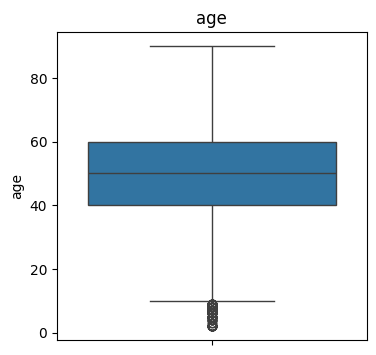

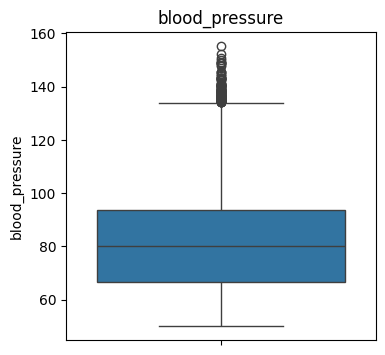

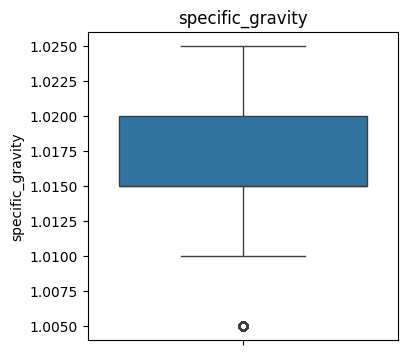

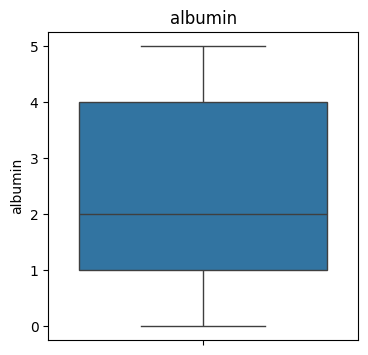

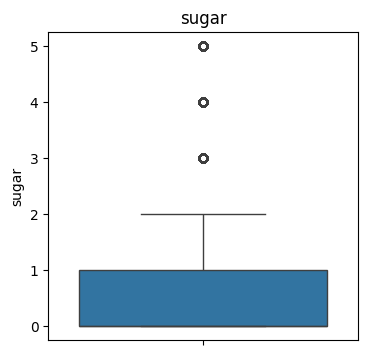

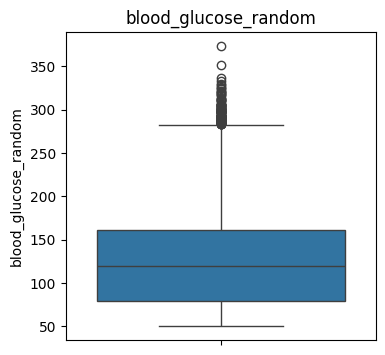

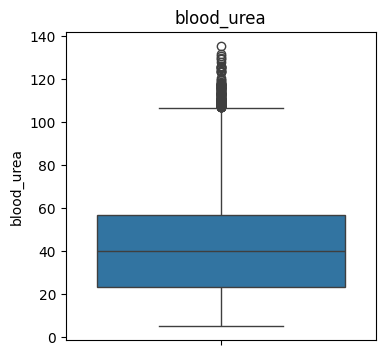

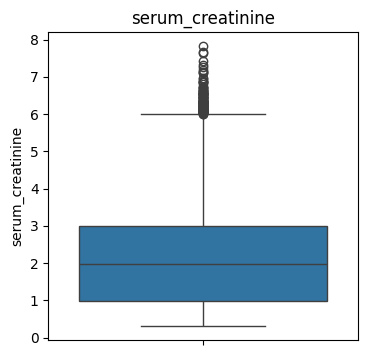

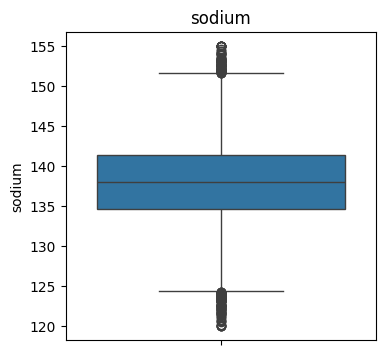

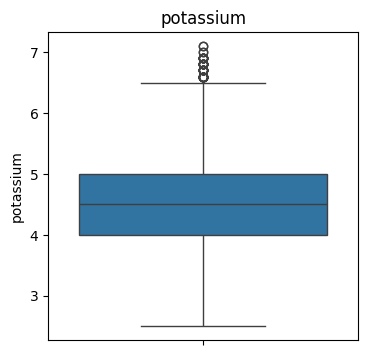

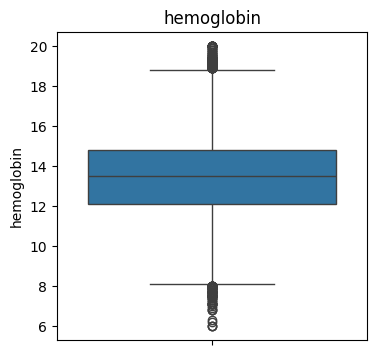

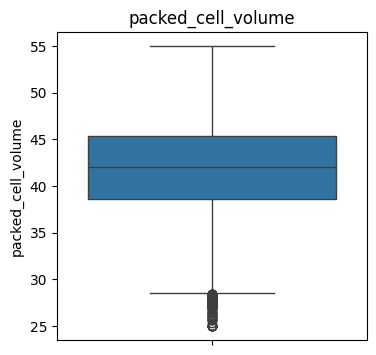

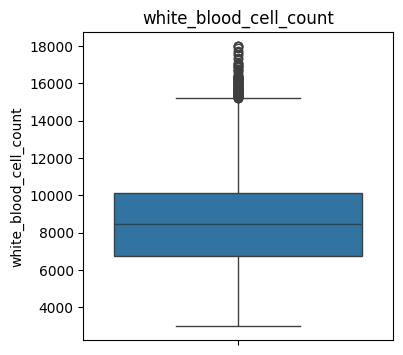

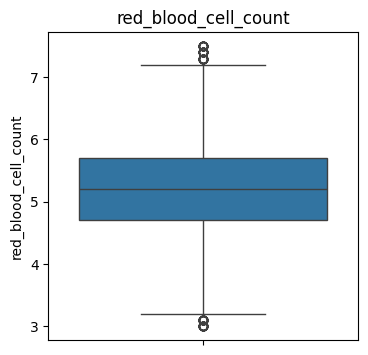

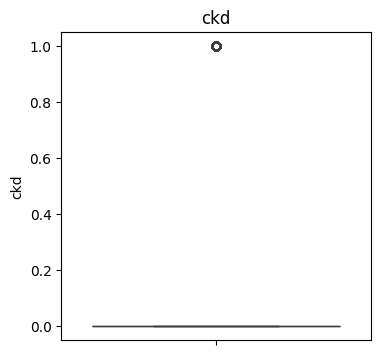

In [31]:
# Checing for outliers in our dataset

for col in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(4,4))
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.show()
    
# Well, our dataset seems to have a lot of outliers in each column


In [32]:
# Encoding Categorical Variables Using LabelEncoder
# I am using LabelEncoder for all the categorical variables as they all have only 2 unique values

from sklearn.preprocessing import LabelEncoder

binary_cols = [col for col in df.columns if df[col].nunique() == 2 and col != 'ckd']

for col in binary_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

display(df.head())

,age,gender,blood_pressure,specific_gravity,albumin,sugar,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,anemia,pedal_edema,ckd
0,62,0,50.0,1.020,4,4,1,0,0,98.1,...,38.3,10132,5.8,1,1,1,0,1,0,1
1,44,0,90.4,1.010,1,0,1,0,0,186.2,...,41.0,6703,6.0,1,1,0,0,1,0,0
2,20,1,65.1,1.010,0,0,1,0,0,201.3,...,36.5,6712,5.6,1,0,0,0,0,0,0
3,66,0,99.1,1.025,2,0,1,0,0,151.9,...,38.1,5327,5.7,0,1,1,0,1,0,0
4,54,1,70.2,1.020,1,0,1,0,0,163.7,...,31.4,6573,3.9,1,1,0,0,1,0,0


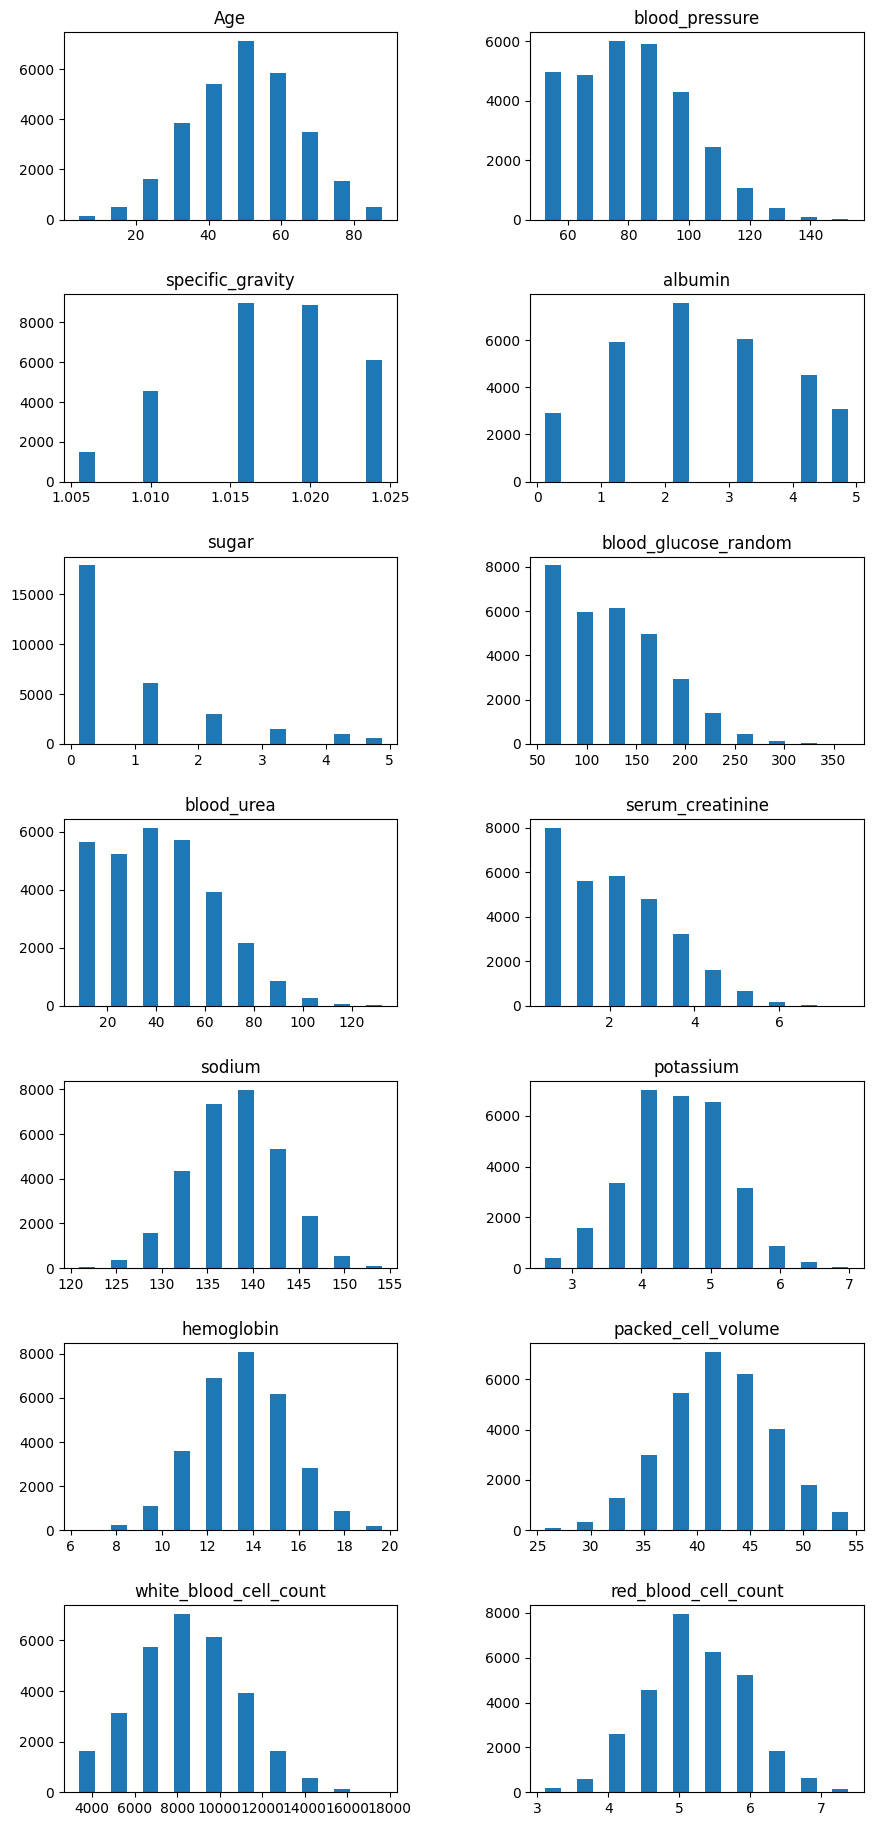

In [33]:
# Visualizing Numerical column and what value_counts they have through Histogram

fig, ax = plt.subplots(nrows = 7, ncols = 2, figsize = (10,22))

ax[0,0].hist(df['age'], rwidth = 0.5)
ax[0,1].hist(df['blood_pressure'], rwidth = 0.5)
ax[1,0].hist(df['specific_gravity'], rwidth = 0.5)
ax[1,1].hist(df['albumin'], rwidth = 0.5)
ax[2,0].hist(df['sugar'], rwidth = 0.5)
ax[2,1].hist(df['blood_glucose_random'], rwidth = 0.5)
ax[3,0].hist(df['blood_urea'], rwidth = 0.5)
ax[3,1].hist(df['serum_creatinine'], rwidth = 0.5)
ax[4,0].hist(df['sodium'], rwidth = 0.5)
ax[4,1].hist(df['potassium'], rwidth = 0.5)
ax[5,0].hist(df['hemoglobin'], rwidth = 0.5)
ax[5,1].hist(df['packed_cell_volume'], rwidth = 0.5)
ax[6,0].hist(df['white_blood_cell_count'], rwidth = 0.5)
ax[6,1].hist(df['red_blood_cell_count'], rwidth = 0.5)


ax[0,0].set_title('Age')
ax[0,1].set_title('blood_pressure')
ax[1,0].set_title('specific_gravity')
ax[1,1].set_title('albumin')
ax[2,0].set_title('sugar')
ax[2,1].set_title('blood_glucose_random')
ax[3,0].set_title('blood_urea')
ax[3,1].set_title('serum_creatinine')
ax[4,0].set_title('sodium')
ax[4,1].set_title('potassium')
ax[5,0].set_title('hemoglobin')
ax[5,1].set_title('packed_cell_volume')
ax[6,0].set_title('white_blood_cell_count')
ax[6,1].set_title('red_blood_cell_count')

plt.tight_layout()

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

plt.show()

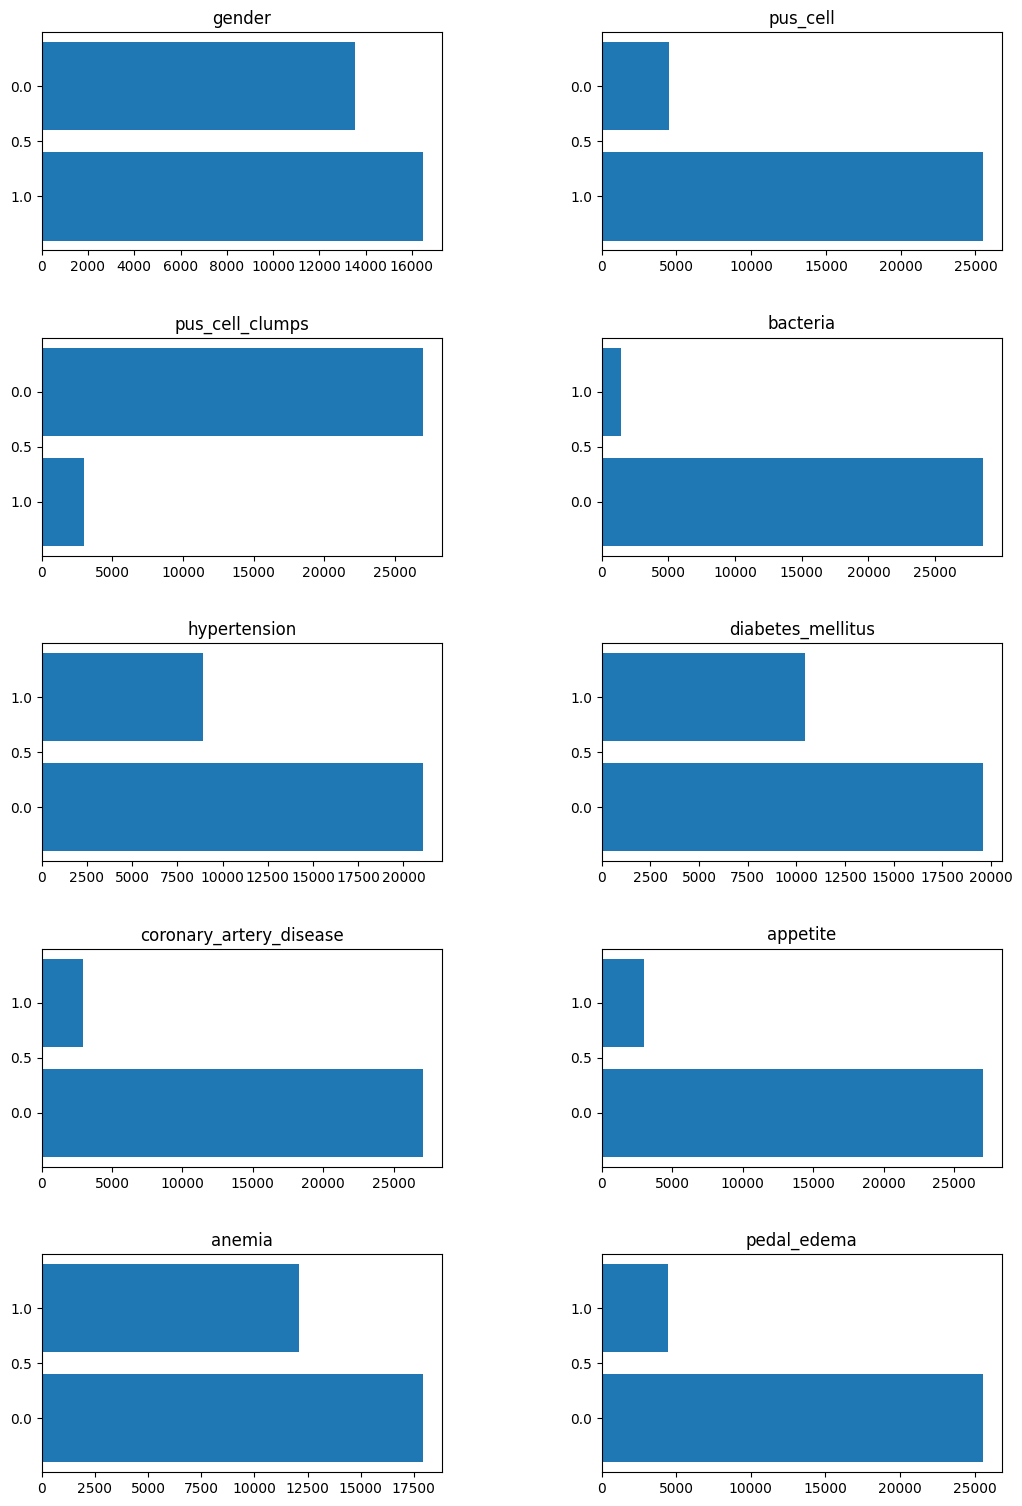

In [34]:
# Visualizing each Categorical Column and what is their  value_count through a bar chart

fig , ax=plt.subplots(nrows = 5, ncols = 2, figsize = (12,18))

ax[0,0].barh(df['gender'].value_counts().index, df['gender'].value_counts().values)
ax[0,1].barh(df['pus_cell'].value_counts().index, df['pus_cell'].value_counts().values)
ax[1,0].barh(df['pus_cell_clumps'].value_counts().index, df['pus_cell_clumps'].value_counts().values)
ax[1,1].barh(df['bacteria'].value_counts().index, df['bacteria'].value_counts().values)
ax[2,1].barh(df['hypertension'].value_counts().index, df['hypertension'].value_counts().values)
ax[2,0].barh(df['diabetes_mellitus'].value_counts().index, df['diabetes_mellitus'].value_counts().values)
ax[3,0].barh(df['coronary_artery_disease'].value_counts().index, df['coronary_artery_disease'].value_counts().values)
ax[3,1].barh(df['appetite'].value_counts().index, df['appetite'].value_counts().values)
ax[4,0].barh(df['anemia'].value_counts().index, df['anemia'].value_counts().values)
ax[4,1].barh(df['pedal_edema'].value_counts().index, df['pedal_edema'].value_counts().values)


ax[0,0].set_title('gender')
ax[0,1].set_title('pus_cell')
ax[1,0].set_title('pus_cell_clumps')
ax[1,1].set_title('bacteria')
ax[2,0].set_title('hypertension')
ax[2,1].set_title('diabetes_mellitus')
ax[3,0].set_title('coronary_artery_disease')
ax[3,1].set_title('appetite')
ax[4,0].set_title('anemia')
ax[4,1].set_title('pedal_edema')

ax[0,0].invert_yaxis()
ax[0,1].invert_yaxis()
ax[1,0].invert_yaxis()

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

plt.show()

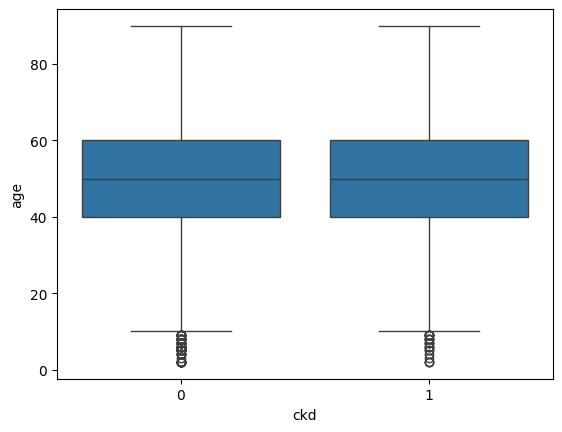

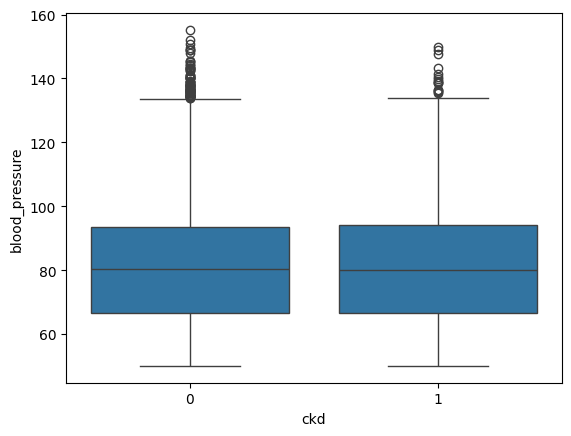

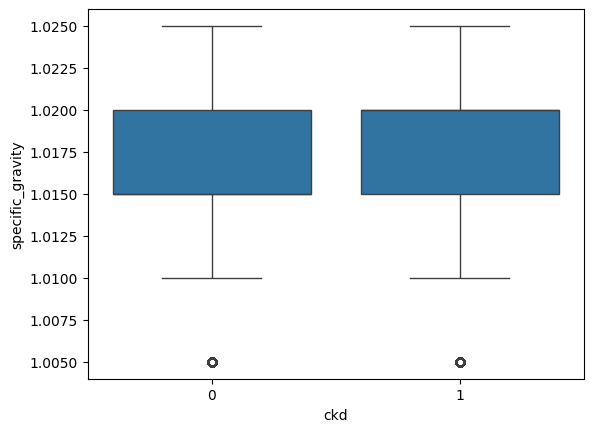

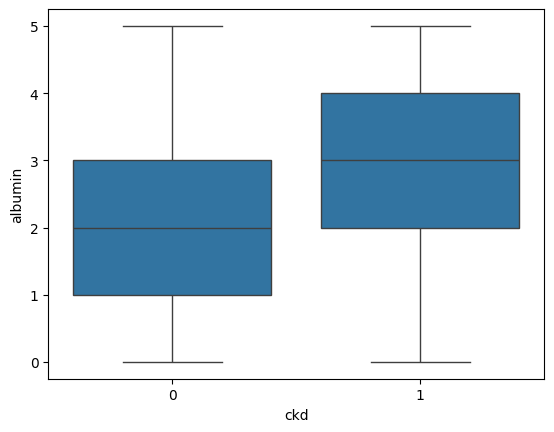

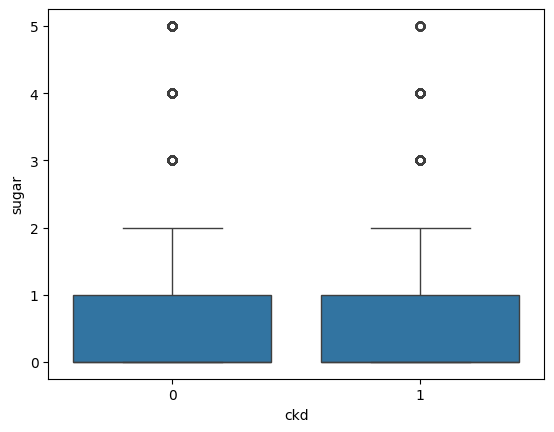

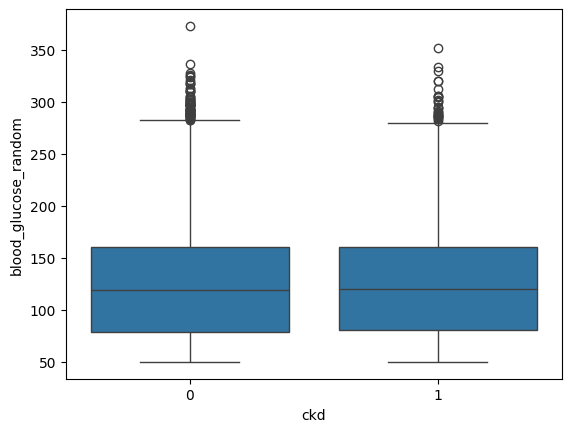

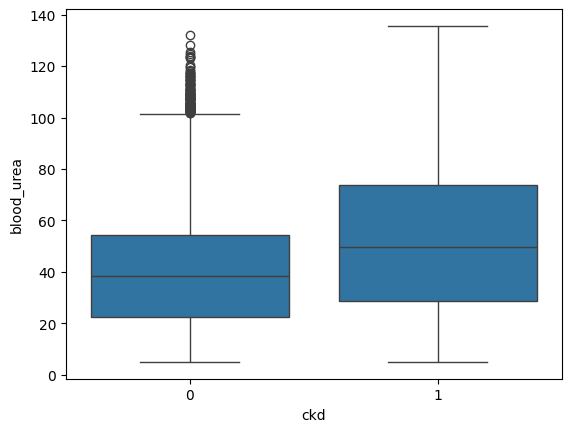

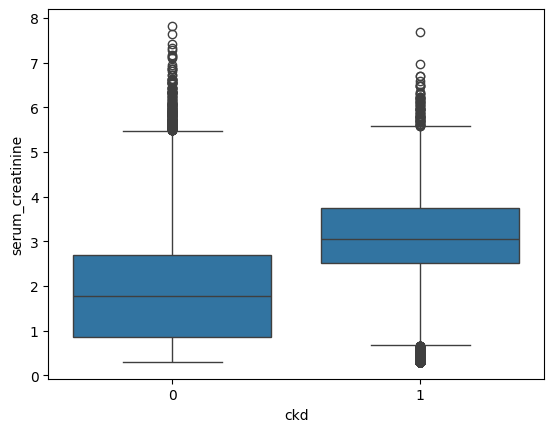

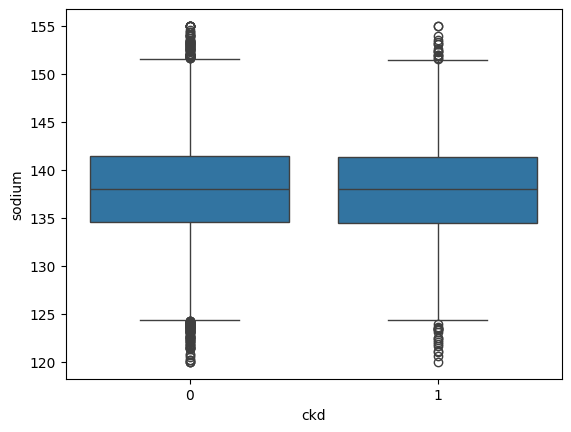

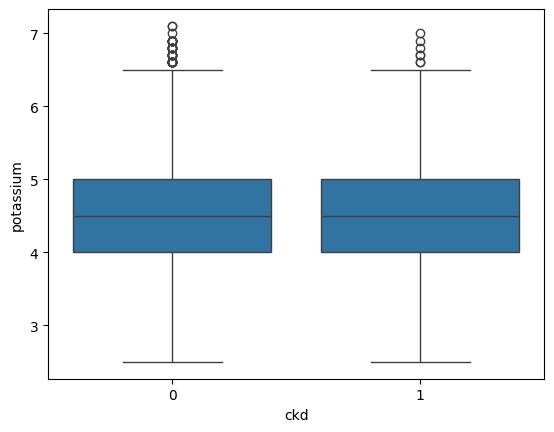

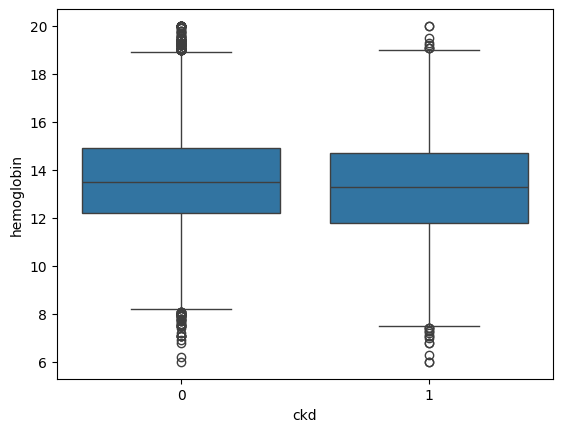

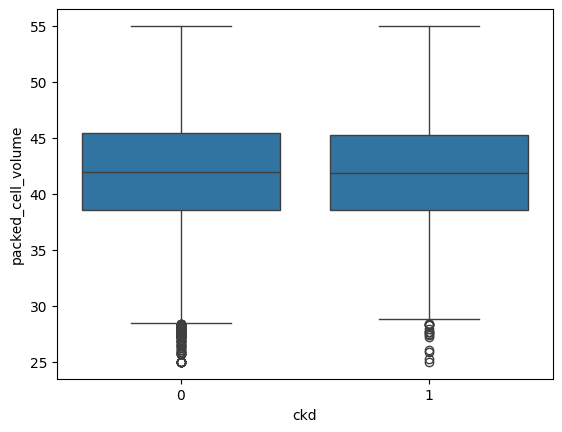

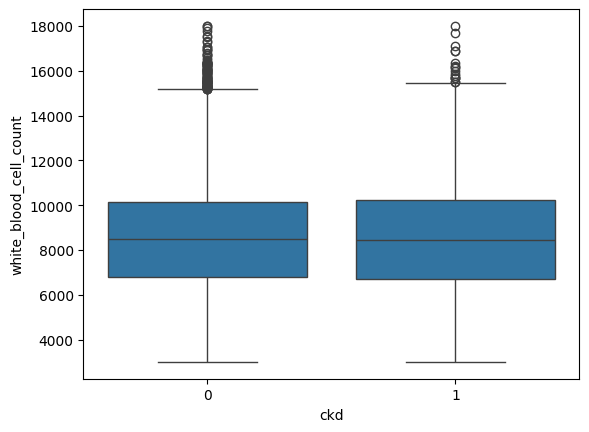

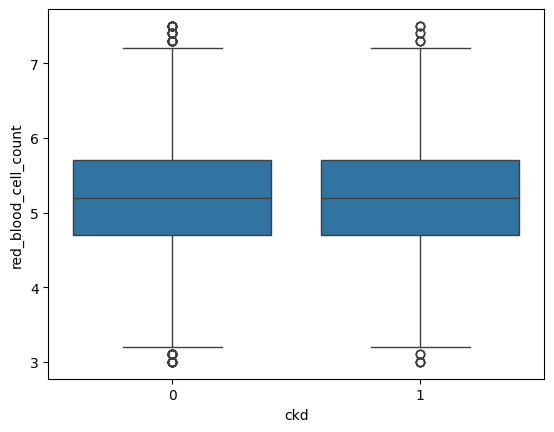

(<Axes: xlabel='ckd', ylabel='red_blood_cell_count'>, None)

In [39]:
# Numerical vs Target Variable Box plots

sns.boxplot(x = "ckd", y="age", data=df), plt.show()
sns.boxplot(x = "ckd", y="blood_pressure", data=df), plt.show()
sns.boxplot(x = "ckd", y="specific_gravity", data=df), plt.show()
sns.boxplot(x = "ckd", y="albumin", data=df), plt.show()
sns.boxplot(x = "ckd", y="sugar", data=df), plt.show()
sns.boxplot(x = "ckd", y="blood_glucose_random", data=df), plt.show()
sns.boxplot(x = "ckd", y="blood_urea", data=df), plt.show()
sns.boxplot(x = "ckd", y="serum_creatinine", data=df), plt.show()
sns.boxplot(x = "ckd", y="sodium", data=df), plt.show()
sns.boxplot(x = "ckd", y="potassium", data=df), plt.show()
sns.boxplot(x = "ckd", y="hemoglobin", data=df), plt.show()
sns.boxplot(x = "ckd", y="packed_cell_volume", data=df), plt.show()
sns.boxplot(x = "ckd", y="white_blood_cell_count", data=df), plt.show()
sns.boxplot(x = "ckd", y="red_blood_cell_count", data=df), plt.show()

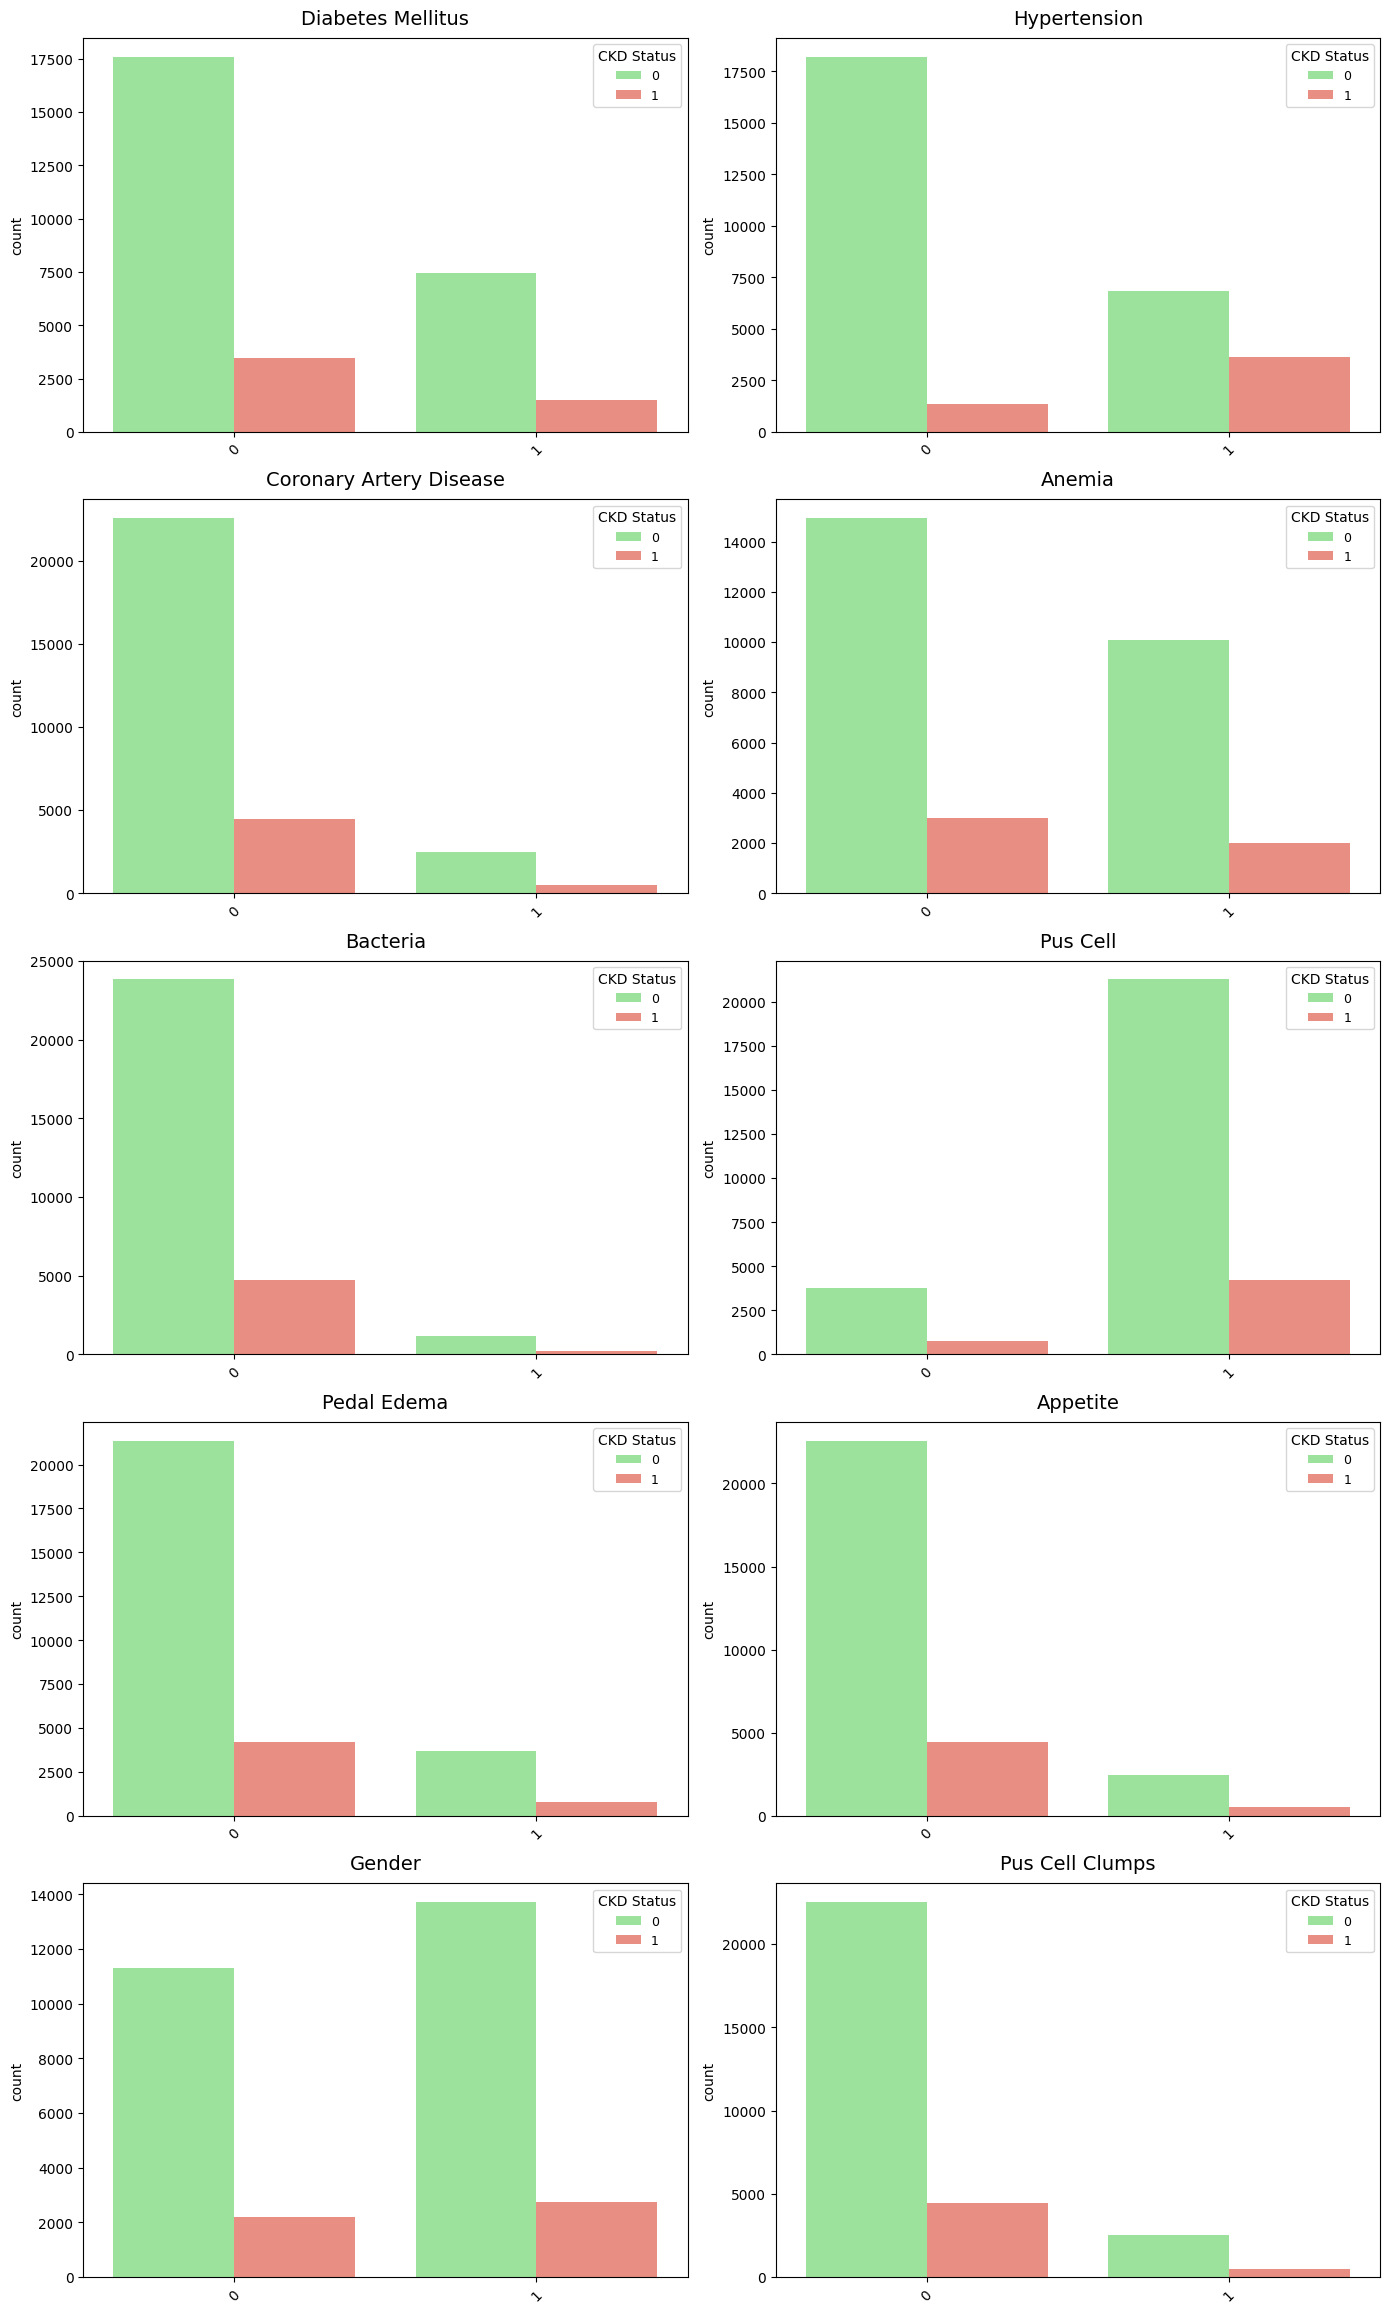

In [44]:
# Categorical vs Target Variable Stacked bar Chart
categorical_vars = [
    'diabetes_mellitus', 'hypertension', 'coronary_artery_disease', 
    'anemia', 'bacteria', 'pus_cell', 'pedal_edema', 
    'appetite', 'gender', 'pus_cell_clumps'
]

fig, axes = plt.subplots(5, 2, figsize=(14, 24))
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    sns.countplot(
        data=df, 
        x=var, 
        hue='ckd',  # your target variable
        ax=axes[i],
        palette=['lightgreen', 'salmon']  # Colors for no CKD and CKD
    )
    
    # Customize each subplot
    axes[i].set_title(f'{var.replace("_", " ").title()}', fontsize=14, pad=10)
    axes[i].set_xlabel('')  # Remove x-label to avoid clutter
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)
    axes[i].legend(title='CKD Status', title_fontsize=10, fontsize=9)
    
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust for main title
plt.show()

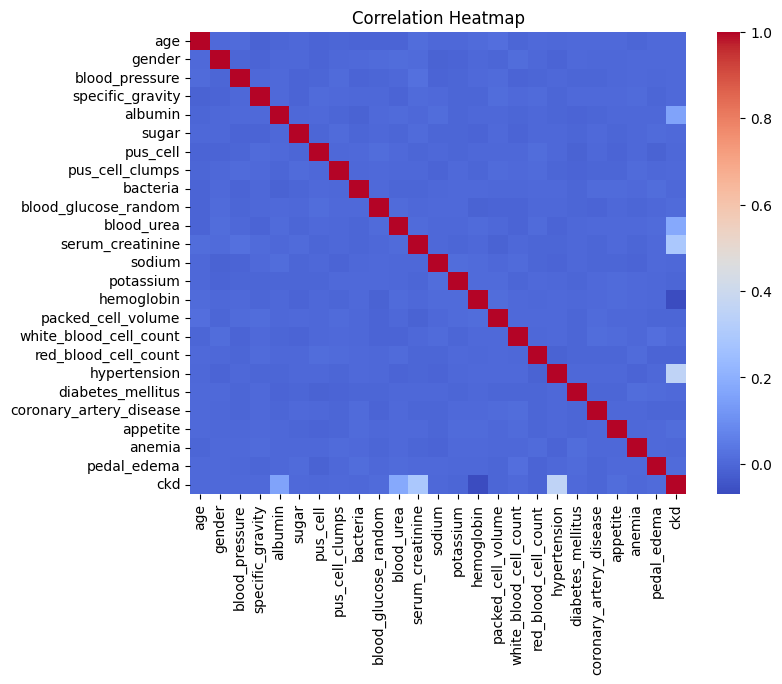

In [37]:
# Create a correlation heatmap

corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [45]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

# --- Load and prepare your dataset ---
# Assume df is your cleaned DataFrame with features and target

# Separate features and target
X = df.drop('ckd', axis=1)  # replace 'target_column' with your target (e.g., 'ckd')
y = df['ckd']


# --- Feature Selection: Univariate (SelectKBest) ---
k = 10  # Number of top features to select

selector_kbest = SelectKBest(score_func=f_classif, k=k)
X_kbest = selector_kbest.fit_transform(X, y)
selected_kbest_features = X.columns[selector_kbest.get_support()]

print(f"\nTop {k} features selected using SelectKBest:")
print(selected_kbest_features.tolist())

# --- Feature Selection: Model-Based (Random Forest) ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

selector_rf = SelectFromModel(model, prefit=True)
X_rf = selector_rf.transform(X)
selected_rf_features = X.columns[selector_rf.get_support()]

print(f"\nFeatures selected using RandomForest feature importance:")
print(selected_rf_features.tolist())



Top 10 features selected using SelectKBest:
['albumin', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'potassium', 'hemoglobin', 'red_blood_cell_count', 'hypertension', 'appetite', 'pedal_edema']

Features selected using RandomForest feature importance:
['albumin', 'blood_urea', 'serum_creatinine', 'hemoglobin', 'hypertension']


e:\BootCamp Assignments\ML_based_Chronic-_Kidney_Disease_Prediction\myenv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [46]:
combined_features = list(set(selected_kbest_features) | set(selected_rf_features))
X_combined_df = X[combined_features]  # Already a DataFrame, no need to convert

In [47]:
X_combined_df

,hemoglobin,appetite,serum_creatinine,blood_glucose_random,albumin,hypertension,red_blood_cell_count,pedal_edema,potassium,blood_urea
0,9.7,0,2.65,98.1,4,1,5.8,0,4.2,37.9
1,14.2,0,3.40,186.2,1,1,6.0,0,3.7,62.2
2,11.1,0,2.19,201.3,0,1,5.6,0,5.0,62.8
3,14.1,0,4.12,151.9,2,0,5.7,0,5.4,5.0
4,15.5,0,0.30,163.7,1,1,3.9,0,4.6,33.0
...,...,...,...,...,...,...,...,...,...,...
29995,12.7,1,2.01,169.7,5,1,4.6,0,4.9,5.0
29996,10.3,0,2.42,76.4,2,0,5.2,1,3.0,72.4
29997,13.8,0,3.47,103.4,2,0,4.7,0,4.7,27.7
29998,9.2,0,2.26,191.3,1,0,3.9,0,3.9,26.4


In [48]:
df_combined = pd.concat([X_combined_df, y.reset_index(drop=True)], axis=1)

In [49]:
df_combined

,hemoglobin,appetite,serum_creatinine,blood_glucose_random,albumin,hypertension,red_blood_cell_count,pedal_edema,potassium,blood_urea,ckd
0,9.7,0,2.65,98.1,4,1,5.8,0,4.2,37.9,1
1,14.2,0,3.40,186.2,1,1,6.0,0,3.7,62.2,0
2,11.1,0,2.19,201.3,0,1,5.6,0,5.0,62.8,0
3,14.1,0,4.12,151.9,2,0,5.7,0,5.4,5.0,0
4,15.5,0,0.30,163.7,1,1,3.9,0,4.6,33.0,0
...,...,...,...,...,...,...,...,...,...,...,...
29995,12.7,1,2.01,169.7,5,1,4.6,0,4.9,5.0,0
29996,10.3,0,2.42,76.4,2,0,5.2,1,3.0,72.4,1
29997,13.8,0,3.47,103.4,2,0,4.7,0,4.7,27.7,0
29998,9.2,0,2.26,191.3,1,0,3.9,0,3.9,26.4,0


In [50]:
df_combined.describe()

,hemoglobin,appetite,serum_creatinine,blood_glucose_random,albumin,hypertension,red_blood_cell_count,pedal_edema,potassium,blood_urea,ckd
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,13.497323,0.099733,2.083082,123.433163,2.417633,0.347533,5.195840,0.148500,4.505577,40.942673,0.165600
std,1.998484,0.299649,1.333525,54.003448,1.461787,0.476195,0.702358,0.355601,0.700804,23.199416,0.371727
min,6.000000,0.000000,0.300000,50.000000,0.000000,0.000000,3.000000,0.000000,2.500000,5.000000,0.000000
25%,12.100000,0.000000,0.980000,79.000000,1.000000,0.000000,4.700000,0.000000,4.000000,23.300000,0.000000
50%,13.500000,0.000000,1.980000,119.700000,2.000000,0.000000,5.200000,0.000000,4.500000,39.900000,0.000000
75%,14.800000,0.000000,2.990000,160.500000,4.000000,1.000000,5.700000,0.000000,5.000000,56.700000,0.000000
max,20.000000,1.000000,7.820000,373.200000,5.000000,1.000000,7.500000,1.000000,7.100000,135.600000,1.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      30000 non-null  int64  
 1   gender                   30000 non-null  int64  
 2   blood_pressure           30000 non-null  float64
 3   specific_gravity         30000 non-null  float64
 4   albumin                  30000 non-null  int64  
 5   sugar                    30000 non-null  int64  
 6   pus_cell                 30000 non-null  int64  
 7   pus_cell_clumps          30000 non-null  int64  
 8   bacteria                 30000 non-null  int64  
 9   blood_glucose_random     30000 non-null  float64
 10  blood_urea               30000 non-null  float64
 11  serum_creatinine         30000 non-null  float64
 12  sodium                   30000 non-null  float64
 13  potassium                30000 non-null  float64
 14  hemoglobin            

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# --- Define your features and target ---
X = X_combined_df  # Your selected features DataFrame
y = y  # Your target variable (Series)

# --- Split data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Specify feature groups ---
num_features = ['hemoglobin', 'serum_creatinine', 'blood_glucose_random', 
                'albumin', 'red_blood_cell_count', 'potassium', 'blood_urea']

binary_features = ['appetite', 'hypertension', 'pedal_edema']

# --- Preprocessor ---
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_features),
    ('bin', 'passthrough', binary_features)
])

# --- Define models wrapped in pipelines ---
models = {
    "Logistic Regression": Pipeline([
        ('preprocess', preprocessor),
        ('clf', LogisticRegression(max_iter=1000))
    ]),
    "SVC": Pipeline([
        ('preprocess', preprocessor),
        ('clf', SVC(probability=True))
    ]),
    "Decision Tree": Pipeline([
        ('preprocess', preprocessor),  # scaling won't affect DT but keep consistent
        ('clf', DecisionTreeClassifier())
    ]),
    "Random Forest": Pipeline([
        ('preprocess', preprocessor),
        ('clf', RandomForestClassifier(n_estimators=100))
    ]),
    "Bagging (DT)": Pipeline([
        ('preprocess', preprocessor),
        ('clf', BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100))
    ]),
    "Gradient Boosting": Pipeline([
        ('preprocess', preprocessor),
        ('clf', GradientBoostingClassifier(n_estimators=100))
    ])
}

# --- Evaluation function ---
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Check if model supports predict_proba for ROC AUC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        roc_auc = None

    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc
    }

# --- Run evaluation on all models ---
results = []
for name, pipeline in models.items():
    metrics = evaluate_model(name, pipeline, X_train, X_test, y_train, y_test)
    results.append(metrics)

# --- Display results ---
results_df = pd.DataFrame(results).sort_values(by="ROC AUC", ascending=False)
print("📊 Model Evaluation Summary:")
print(results_df)

📊 Model Evaluation Summary:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
3        Random Forest  0.974667   0.982340  0.867446  0.921325  0.938249
4         Bagging (DT)  0.973833   0.981174  0.863548  0.918611  0.935392
5    Gradient Boosting  0.973833   0.982242  0.862573  0.918526  0.928314
1                  SVC  0.938667   0.919643  0.702729  0.796685  0.925212
2        Decision Tree  0.933833   0.788797  0.837232  0.812293  0.895496
0  Logistic Regression  0.887667   0.772446  0.486355  0.596890  0.885320


In [55]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grids = {
    "Random Forest": {
        'clf__n_estimators': [100, 200],
        'clf__max_depth': [None, 10, 20],
        'clf__min_samples_split': [2, 5]
    },
    "Bagging (DT)": {
        'clf__n_estimators': [50, 100],
        'clf__max_samples': [0.8, 1.0],
        'clf__estimator__max_depth': [None, 10, 20]
    },
    "Gradient Boosting": {
        'clf__n_estimators': [100, 200],
        'clf__learning_rate': [0.01, 0.1],
        'clf__max_depth': [3, 5, 10]
    }
}

best_models = {}

for model_name in ["Random Forest", "Bagging (DT)", "Gradient Boosting"]:
    print(f"🔍 Tuning hyperparameters for {model_name}...")

    grid_search = GridSearchCV(
        estimator=models[model_name],
        param_grid=param_grids[model_name],
        scoring='roc_auc',
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_

    print(f"Best params for {model_name}: {grid_search.best_params_}")
    print(f"Best CV ROC AUC: {grid_search.best_score_:.4f}\n")

# --- Re-evaluate best models on test set ---
results_tuned = []
for name, model in best_models.items():
    metrics = evaluate_model(name, model, X_train, X_test, y_train, y_test)
    results_tuned.append(metrics)

results_tuned_df = pd.DataFrame(results_tuned).sort_values(by="ROC AUC", ascending=False)
print("📊 Model Evaluation After Hyperparameter Tuning:")
print(results_tuned_df)

🔍 Tuning hyperparameters for Random Forest...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params for Random Forest: {'clf__max_depth': None, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}
Best CV ROC AUC: 0.9225

🔍 Tuning hyperparameters for Bagging (DT)...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params for Bagging (DT): {'clf__estimator__max_depth': 20, 'clf__max_samples': 1.0, 'clf__n_estimators': 100}
Best CV ROC AUC: 0.9217

🔍 Tuning hyperparameters for Gradient Boosting...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params for Gradient Boosting: {'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__n_estimators': 100}
Best CV ROC AUC: 0.9188

📊 Model Evaluation After Hyperparameter Tuning:
               Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0      Random Forest  0.974667   0.982340  0.867446  0.921325  0.937626
1       Bagging (DT)  0.974000   0.981195  0.864522  0.919171  0.933042
2

In [56]:
import joblib

# Save the best model (Random Forest pipeline)
joblib.dump(best_models["Random Forest"], "final_random_forest_pipeline.pkl")

print("✅ Final model pipeline saved as 'final_random_forest_pipeline.pkl'")

✅ Final model pipeline saved as 'final_random_forest_pipeline.pkl'
